In [25]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("projectDataset.csv")

In [27]:
df.head()

,State,Crop,District,Year,Season,Area,Production,Yield,SO2,NO2,RSPM,SPM
0,Chhattisgarh,Arhar/Tur,Bilaspur,2013,Kharif,2308.0,1474,0.64,5.291667,21.473958,119.71875,389.201373
1,Chhattisgarh,Bajra,Bilaspur,2013,Kharif,14.0,7,0.50,5.291667,21.473958,119.71875,389.201373
2,Chhattisgarh,Barley,Bilaspur,2013,Rabi,3.0,2,0.67,5.291667,21.473958,119.71875,389.201373
3,Chhattisgarh,Coriander,Bilaspur,2013,Whole Year,243.0,66,0.27,5.291667,21.473958,119.71875,389.201373
4,Chhattisgarh,Dry chillies,Bilaspur,2013,Whole Year,405.0,369,0.91,5.291667,21.473958,119.71875,389.201373


In [28]:
df.columns

Index(['State', 'Crop', 'District', 'Year', 'Season', 'Area', 'Production',
       'Yield', 'SO2', 'NO2', 'RSPM', 'SPM'],
      dtype='object')

In [29]:
'''The Crop Susceptibility Index (CSI) is calculated based on environmental stressors (pollution factors) and yield deviation, which measures the variability of yield over time. Below is a line-by-line breakdown of how CSI is computed:'''

'The Crop Susceptibility Index (CSI) is calculated based on environmental stressors (pollution factors) and yield deviation, which measures the variability of yield over time. Below is a line-by-line breakdown of how CSI is computed:'

In [30]:
# Step 1: Compute Yield Deviation per District-Crop Combination
yield_deviation = df.groupby(['District', 'Crop'])['Yield'].std().reset_index()
yield_deviation.rename(columns={'Yield': 'Yield_Deviation'}, inplace=True)
df = df.merge(yield_deviation, on=['District', 'Crop'], how='left')

In [31]:
## Yield Deviation represents the variability in crop yield over the years.
## Higher deviation means the crop in that district is more affected by external factors (e.g., pollution, weather).

In [32]:
df.head()

,State,Crop,District,Year,Season,Area,Production,Yield,SO2,NO2,RSPM,SPM,Yield_Deviation
0,Chhattisgarh,Arhar/Tur,Bilaspur,2013,Kharif,2308.0,1474,0.64,5.291667,21.473958,119.71875,389.201373,0.000000
1,Chhattisgarh,Bajra,Bilaspur,2013,Kharif,14.0,7,0.50,5.291667,21.473958,119.71875,389.201373,0.072111
2,Chhattisgarh,Barley,Bilaspur,2013,Rabi,3.0,2,0.67,5.291667,21.473958,119.71875,389.201373,0.190526
3,Chhattisgarh,Coriander,Bilaspur,2013,Whole Year,243.0,66,0.27,5.291667,21.473958,119.71875,389.201373,0.005774
4,Chhattisgarh,Dry chillies,Bilaspur,2013,Whole Year,405.0,369,0.91,5.291667,21.473958,119.71875,389.201373,0.215948


In [33]:
# Step 2: Normalize Pollution and Yield Deviation to Compute CSI
csi_features = ['SO2', 'NO2', 'RSPM', 'SPM', 'Yield_Deviation']


In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
df[csi_features] = imputer.fit_transform(df[csi_features])

In [36]:
scaler = MinMaxScaler()
df[csi_features] = scaler.fit_transform(df[csi_features])

In [37]:
## Why normalization?

## Pollution levels and yield deviations have different scales.
## Example: SO₂ levels may be in parts per million (ppm), while Yield Deviation is in kg/hectare.
## Normalizing ensures each factor contributes equally to CSI.

In [38]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [22]:
# --------- PCA-Based Weight Calculation for CSI --------- #

In [39]:
# Applying PCA on environmental factors
pca = PCA(n_components=len(csi_features))  # Number of components = number of variables
pca.fit(df[csi_features])

PCA(n_components=5)

In [40]:
# Extract explained variance (eigenvalues) as weights
pca_weights = pca.explained_variance_ratio_

In [42]:
# Compute CSI using PCA-based weights
import numpy as np
df['CSI_PCA'] = np.dot(df[csi_features], pca_weights)

In [43]:
df

,State,Crop,District,Year,Season,Area,Production,Yield,SO2,NO2,RSPM,SPM,Yield_Deviation,CSI_PCA
0,Chhattisgarh,Arhar/Tur,Bilaspur,2013,Kharif,2308.0,1474,0.64,0.099988,0.314475,0.304808,0.643068,0.000000e+00,0.227889
1,Chhattisgarh,Bajra,Bilaspur,2013,Kharif,14.0,7,0.50,0.099988,0.314475,0.304808,0.643068,1.182172e-05,0.227889
2,Chhattisgarh,Barley,Bilaspur,2013,Rabi,3.0,2,0.67,0.099988,0.314475,0.304808,0.643068,3.123435e-05,0.227890
3,Chhattisgarh,Coriander,Bilaspur,2013,Whole Year,243.0,66,0.27,0.099988,0.314475,0.304808,0.643068,9.464955e-07,0.227889
4,Chhattisgarh,Dry chillies,Bilaspur,2013,Whole Year,405.0,369,0.91,0.099988,0.314475,0.304808,0.643068,3.540197e-05,0.227890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31823,Tamil Nadu,Sweet potato,Thoothukudi,2015,Whole Year,58.0,1020,17.59,0.342181,0.251517,0.215135,0.552096,5.139882e-04,0.316917
31824,Tamil Nadu,Tapioca,Thoothukudi,2015,Whole Year,2.0,65,32.50,0.342181,0.251517,0.215135,0.552096,6.786197e-04,0.316920
31825,Tamil Nadu,Turmeric,Thoothukudi,2015,Whole Year,6.0,24,4.00,0.342181,0.251517,0.215135,0.552096,1.255463e-04,0.316910
31826,Tamil Nadu,Urad,Thoothukudi,2015,Kharif,254.0,205,0.81,0.342181,0.251517,0.215135,0.552096,4.383338e-05,0.316908


In [44]:
# --------- Regression-Based Weight Calculation for CSI --------- #

In [45]:
# Defining independent (pollution) and dependent (Yield) variables
X_mlr = df[['SO2', 'NO2', 'RSPM', 'SPM']]
y_mlr = df['Yield']

In [46]:
# Train a Multiple Linear Regression model
mlr_model = LinearRegression()
mlr_model.fit(X_mlr, y_mlr)


LinearRegression()

In [47]:
# Extract absolute regression coefficients as weights
regression_weights = np.abs(mlr_model.coef_)
regression_weights /= regression_weights.sum()  # Normalize to sum up to 1

In [48]:
# Compute CSI using regression-based weights
df['CSI_Regression'] = np.dot(df[['SO2', 'NO2', 'RSPM', 'SPM']], regression_weights)

In [49]:
# Compute the average CSI from both methods
df['CSI_Avg'] = (df['CSI_PCA'] + df['CSI_Regression']) / 2

In [50]:
df

,State,Crop,District,Year,Season,Area,Production,Yield,SO2,NO2,RSPM,SPM,Yield_Deviation,CSI_PCA,CSI_Regression,CSI_Avg
0,Chhattisgarh,Arhar/Tur,Bilaspur,2013,Kharif,2308.0,1474,0.64,0.099988,0.314475,0.304808,0.643068,0.000000e+00,0.227889,0.326431,0.277160
1,Chhattisgarh,Bajra,Bilaspur,2013,Kharif,14.0,7,0.50,0.099988,0.314475,0.304808,0.643068,1.182172e-05,0.227889,0.326431,0.277160
2,Chhattisgarh,Barley,Bilaspur,2013,Rabi,3.0,2,0.67,0.099988,0.314475,0.304808,0.643068,3.123435e-05,0.227890,0.326431,0.277160
3,Chhattisgarh,Coriander,Bilaspur,2013,Whole Year,243.0,66,0.27,0.099988,0.314475,0.304808,0.643068,9.464955e-07,0.227889,0.326431,0.277160
4,Chhattisgarh,Dry chillies,Bilaspur,2013,Whole Year,405.0,369,0.91,0.099988,0.314475,0.304808,0.643068,3.540197e-05,0.227890,0.326431,0.277160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31823,Tamil Nadu,Sweet potato,Thoothukudi,2015,Whole Year,58.0,1020,17.59,0.342181,0.251517,0.215135,0.552096,5.139882e-04,0.316917,0.322344,0.319630
31824,Tamil Nadu,Tapioca,Thoothukudi,2015,Whole Year,2.0,65,32.50,0.342181,0.251517,0.215135,0.552096,6.786197e-04,0.316920,0.322344,0.319632
31825,Tamil Nadu,Turmeric,Thoothukudi,2015,Whole Year,6.0,24,4.00,0.342181,0.251517,0.215135,0.552096,1.255463e-04,0.316910,0.322344,0.319627
31826,Tamil Nadu,Urad,Thoothukudi,2015,Kharif,254.0,205,0.81,0.342181,0.251517,0.215135,0.552096,4.383338e-05,0.316908,0.322344,0.319626


In [51]:
# --------- K-Means-Based Risk Classification --------- #

In [52]:
# Selecting CSI_Avg for clustering
X_risk = df[['CSI_Avg']].copy()

In [53]:
# Applying K-Means with 3 clusters (High, Medium, Low Risk)
kmeans_risk = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Risk_Cluster'] = kmeans_risk.fit_predict(X_risk)


In [54]:
# Sorting clusters based on average CSI to assign meaningful labels
cluster_avg_csi = df.groupby('Risk_Cluster')['CSI_Avg'].mean().sort_values()
risk_mapping = {cluster_avg_csi.index[0]: 'Low-Risk', 
                cluster_avg_csi.index[1]: 'Medium-Risk', 
                cluster_avg_csi.index[2]: 'High-Risk'}

In [55]:
df['Risk_Zone'] = df['Risk_Cluster'].map(risk_mapping)

In [58]:
new_df=df['Risk_Zone'].value_counts().reset_index()

In [59]:
new_df

,Risk_Zone,count
0,Medium-Risk,13548
1,Low-Risk,11511
2,High-Risk,6769


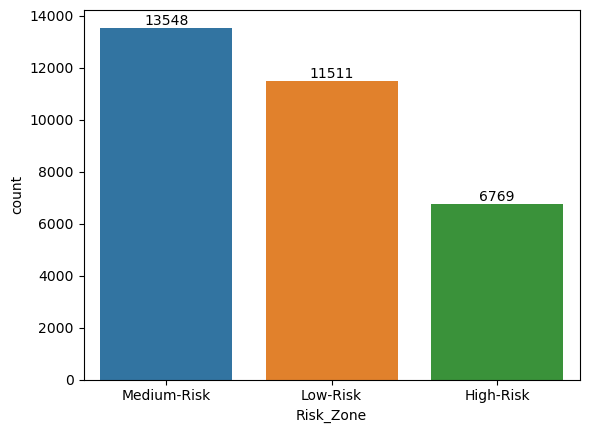

In [60]:
ax=sns.barplot(x='Risk_Zone', y='count', data=new_df)

for bars in ax.containers:
    ax.bar_label(bars)

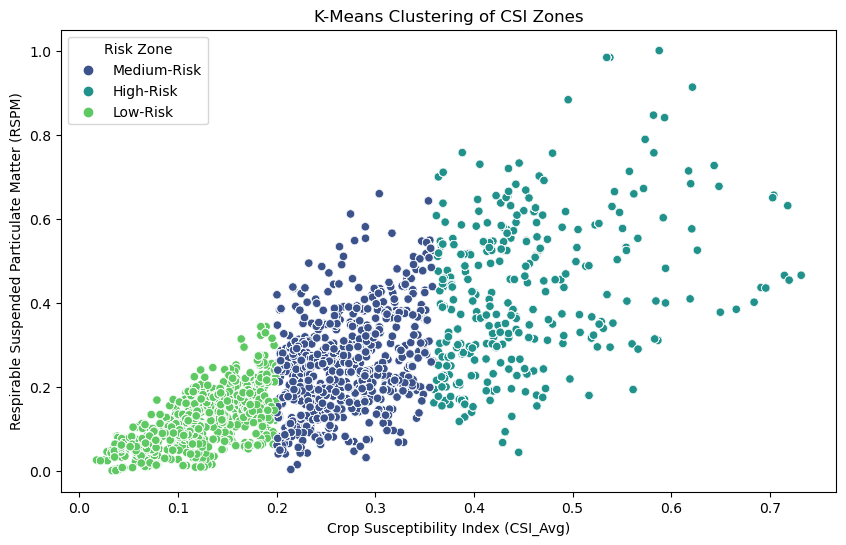

In [63]:

# --------- Visualization of Clustering --------- #
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['CSI_Avg'], y=df['RSPM'], hue=df['Risk_Zone'], palette="viridis")
plt.title("K-Means Clustering of CSI Zones")
plt.xlabel("Crop Susceptibility Index (CSI_Avg)")
plt.ylabel("Respirable Suspended Particulate Matter (RSPM)")
plt.legend(title="Risk Zone")
plt.show()